In [205]:
from bs4 import BeautifulSoup
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd #needs version < 2.0 to work
import csv
import time
import concurrent.futures
from tabulate import tabulate
import numpy
import unicodedata
import re
import fractions
import os
import seaborn as sns
import matplotlib.pyplot as plt



# Goal of this script:
# 1. Scrape all data from the Diffords Guide
# 2. Export the retrieved data in a .csv file

In [206]:
baseurl = "https://www.diffordsguide.com/cocktails/recipe/" # then: {NUMBER}/index.html"
basedata = {
    'Name': [],
    'Glass': [],
    'Garnish': [],
    'How to make': [],
    'Contents': [],
    'Ratios': [],
    'Gentle / Boozy': [],
    'Sweet / Dry Sour': [],
    'Calories': [],
    'Calories2': [],
    'Alcohol percentage': [],
    'Alcohol percentage2': [],
    #'User Rating': [],
    'Popularity': [],
    #'Difford Rating': [],
    'Category': [],
    'URL': []
}
cocktail_df = pd.DataFrame()


In [207]:
"""Initialize the scraping process"""
filename = 'out_fin.csv'
for filename in os.listdir('.'):
    if os.path.isfile(filename):
        print("Scrape already done, please continue")
        continue
    else:
        print("Scrape has not been initiated, let's begin")
        current_url = ""
        page = ""
        soup_cocktail = ""
        testlist = []
        starttime = time.time()
        """Loop to get the information"""
        for i in range(0, 6572): #put 6572 when testing ok; will take approx. 9h to complete with 5s delay each :)
            img_tag = ""
            img_tag2 = ""
            current_url = "{}{}/index.html".format(baseurl, i)
            page = requests.get(current_url)
            print("Current URL is: ", current_url)
            basedata['URL'] = current_url

            soup_cocktail = BeautifulSoup(page.content, "html.parser")

            basedata['Name'] = soup_cocktail.select_one('h1')
            if basedata['Name']:
                basedata['Name'] = basedata['Name'].text.strip()
            else:
                basedata['Name'] = ""
            print(basedata['Name'])

            basedata['Glass'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(2) > a')
            if basedata['Glass']:
                basedata['Glass'] = basedata['Glass'].text.strip()
            else:
                basedata['Glass'] = ""

            basedata['Garnish'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(3) > p')
            if basedata['Garnish']:
                basedata['Garnish'] = basedata['Garnish'].text.split()
            else:
                basedata['Garnish'] = []

            basedata['How to make'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(4) > p')
            if basedata['How to make']:
                basedata['How to make'] = basedata['How to make'].text.strip()
            else:
                basedata['How to make'] = ""

            basedata['Calories'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(13) > p > strong')
            if basedata['Calories']:
                basedata['Calories'] = basedata['Calories'].text.strip()
            else:
                basedata['Calories'] = ""
            
            basedata['Calories2'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(12) > p > strong')
            if basedata['Calories2']:
                basedata['Calories2'] = basedata['Calories2'].text.strip()
            else:
                basedata['Calories2'] = ""

            basedata['Alcohol percentage'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(14) > ul > li:nth-child(2)')
            if basedata['Alcohol percentage']:
                basedata['Alcohol percentage'] = basedata['Alcohol percentage'].text.split("%")[0].strip()
            else:
                basedata['Alcohol percentage'] = ""

            basedata['Alcohol percentage2'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(13) > ul > li:nth-child(2)')
            if basedata['Alcohol percentage2']:
                basedata['Alcohol percentage2'] = basedata['Alcohol percentage2'].text.split("%")[0].strip()
            else:
                basedata['Alcohol percentage2'] = ""

            basedata['Popularity'] = soup_cocktail.select_one('body > div.grid-x.grid-margin-y > div.cell.main-content > div.strip.strip--content.bg-cocktails-tone.strip--notch > div > div > div:nth-child(2) > div > div.cell.small-12.medium-shrink > div > div.cell.shrink.alt-font.text-small.always-first-small.no-wrap > span')
            if basedata['Popularity']:
                basedata['Popularity'] = basedata['Popularity'].text.split()[0].split('(')[1].strip()
            else:
                basedata['Popularity'] = ""

            basedata['Category'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div.cell.hide-for-large > p > a:nth-child(1) > strong')
            if basedata['Category']:
                basedata['Category'] = basedata['Category'].text.strip()
            else:
                basedata['Category'] = ""

            basedata['Contents'] = [el.text.strip() for el in soup_cocktail.select('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(5) > table > tbody td:nth-of-type(2)')]
            if not basedata['Contents']:
                basedata['Contents'] = []
            
            if soup_cocktail.select('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(5) > table > tbody td:nth-of-type(1)'):
                basedata['Ratios'] = [el.text.strip() for el in soup_cocktail.select('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(5) > table > tbody td:nth-of-type(1)')]
            else:
                basedata['Ratios'] = ""

            basedata['Sweet / Dry Sour'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(9) > div > div:nth-child(2) > div > div > div:nth-child(3) > img')
            if basedata['Sweet / Dry Sour']:
                basedata['Sweet / Dry Sour'] = basedata['Sweet / Dry Sour']["alt"].strip()
            else:
                basedata['Sweet / Dry Sour'] = ""
            
            basedata['Gentle / Boozy'] = soup_cocktail.select_one('#sticky-anchor > div > div > div.cell.auto.divide-right-large > div > article > div > div:nth-child(9) > div > div:nth-child(1) > div > div > div:nth-child(3) > img')
            if basedata['Gentle / Boozy']:
                basedata['Gentle / Boozy'] = basedata['Gentle / Boozy']["alt"].strip()
            else:
                basedata['Gentle / Boozy'] = ""
                
            cocktail_df = cocktail_df.append(basedata, ignore_index=True)
            cocktail_df.to_csv("out_temp.csv", index=False, encoding='utf-8') #temp csv in case we get kicked out of the site
            print(" ")
            #Sleep is important not to get kicked out
            time.sleep(5)    
            
            #Erases the last glitched item in the Ratios column
        cocktail_df['Ratios'] = cocktail_df['Ratios'].apply(lambda x: x[:-1] if (x is not None and x) else x)
        cocktail_df.to_csv("out_fin.csv", index=False, encoding='utf-8')
        cocktail_df.to_pickle("out_fin.pkl")
        cocktail_df[-20:]

        endtime = time.time()
        print("Finished in {i:.2f} seconds!".format(i = endtime - starttime))

Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue
Scrape already done, please continue


You will notice that I created 2 columns for "Calories". This emanes from the fact that some cocktails have a "AKA" section, so the selector doesn't work anymore.
To prevent this, I created this temporary, ugly, solution.

Left to do:
1. scrape all data (: (find a way to prevent the site from keeping us out of there because of the high frequency)
2. clean data (oof)
3. start the project!

In [208]:
df = pd.read_csv("out_fin.csv")
df.head()

,Name,Glass,Garnish,How to make,Contents,Ratios,Gentle / Boozy,Sweet / Dry Sour,Calories,Calories2,Alcohol percentage,Alcohol percentage2,Popularity,Category,URL
0,404 - Page not found,NaN,[],NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.diffordsguide.com/cocktails/recipe...
1,Abacaxi Ricaço,Pineapple shell (frozen) glass,"['Cut', 'a', 'straw', 'sized', 'hole', 'in', '...",Cut the top off a small pineapple and carefull...,"['Pineapple (fresh)', 'Gold rum (1-3 years old...","['1 whole', '3 shot', '3⁄4 shot', '1⁄2 shot']",NaN,NaN,NaN,NaN,NaN,25.67,6.0,Frozen (blended),https://www.diffordsguide.com/cocktails/recipe...
2,404 - Page not found,NaN,[],NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.diffordsguide.com/cocktails/recipe...
3,Abbey,Coupe glass,"['Orange', 'zest', 'twist']",SHAKE all ingredients with ice and fine strain...,"['Rutte Dry Gin', 'Lillet Blanc (or other arom...","['1 1⁄2 shot', '3⁄4 shot', '3⁄4 shot', '2 dash']",7.0,7.0,NaN,133 calories,NaN,20.97,27.0,Classic/vintage,https://www.diffordsguide.com/cocktails/recipe...
4,A.B.C. Cocktail,Nick & Nora glass,"['Lemon', 'zest', 'twist', '&', 'Luxardo', 'Ma...",SHAKE all ingredients with ice and fine strain...,"['Mint leaves', 'Tawny port', 'Rémy Martin 173...","['7 fresh', '1 shot', '1 shot', '1⁄4 shot', '1...",7.0,5.0,NaN,NaN,NaN,NaN,11.0,Classic/vintage,https://www.diffordsguide.com/cocktails/recipe...


To delete: Garnish, URL

Now that we have the file, let's clean the data

In [209]:
# Merge the "Alcohol percentage" and "Alcohol percentage2" columns
df['Alcohol percentage'] = df['Alcohol percentage'].fillna(df['Alcohol percentage2'])

# Merge the "Calories" and "Calories2" columns
df['Calories'] = df['Calories'].fillna(df['Calories2'])

# Drop the extra columns & the ones we don't need
df = df.drop(columns=['Alcohol percentage2', 'Calories2', 'Garnish', 'URL'])

# Delete rows where the name is "404 - Page not found"
df = df[df['Name'] != '404 - Page not found']

# Drop rows where "Gentle / Boozy", "Sweet / Dry Sour", "Alcohol percentage", and "Category" columns have NaN values.
# Dilemma: we can't use alcohol percentage because it reduces our dataset by 400. The category is responsible for 300 cocktails, and calories for 1000...
# if we keep them, we have 2400. if not, we have 1200.
df = df.dropna(subset=['Gentle / Boozy', 'Sweet / Dry Sour', 'Calories', 'Alcohol percentage', "Category"])


df.head()

,Name,Glass,How to make,Contents,Ratios,Gentle / Boozy,Sweet / Dry Sour,Calories,Alcohol percentage,Popularity,Category
3,Abbey,Coupe glass,SHAKE all ingredients with ice and fine strain...,"['Rutte Dry Gin', 'Lillet Blanc (or other arom...","['1 1⁄2 shot', '3⁄4 shot', '3⁄4 shot', '2 dash']",7.0,7.0,133 calories,20.97,27.0,Classic/vintage
7,Absinthe Sour,Old-fashioned glass,SHAKE all ingredients with ice and strain back...,"['La Fée Parisienne absinthe', ""Sugar syrup 'r...","['5⁄6 shot', '1⁄3 shot', '1⁄2 shot', '1⁄2 shot...",7.0,6.0,142 calories,21.2,16.0,Classic/vintage
10,Absolutely Fabulous,Flute glass,SHAKE first two ingredients with ice and strai...,"['Ketel One Vodka', 'Cranberry juice (sweetene...","['1 shot', '1 1⁄2 shot', '1 1⁄2 shot']",6.0,6.0,117 calories,11.69,9.0,Champagne
14,Ace Of Clubs Daiquiri,Coupe glass,SHAKE all ingredients with ice and fine strain...,"['Gold rum (1-3 years old mellow light)', 'Dut...","['2 shot', '1⁄2 shot', '1⁄2 shot', '1⁄6 shot']",7.0,6.0,190 calories,23.43,27.0,Classic/vintage
15,Achilles Heel,Collins glass,SHAKE all ingredients with ice and strain into...,"['Bison grass vodka', 'Giffard Framboise de Ro...","['2 shot', '1⁄4 shot', '1⁄4 shot', '2 shot', '...",6.0,6.0,212 calories,14.44,13.0,Long drinks & highballs


In [210]:
print(len(df))
print(numpy.unique(df['Popularity'].isna())) #this means that some cocktails have 0 reviews, that's ok


1208
[False  True]


In [211]:
# Function to convert string fractions to decimal numbers
def fraction_to_decimal(fraction_str):
    # Replace special fraction character with a regular slash
    fraction_str = fraction_str.replace('⁄', '/')
    
    # Check for mixed numbers (e.g., "1 1/2")
    mixed_number_regex = re.compile(r'(\d+)\s+(\d+)/(\d+)')
    match = mixed_number_regex.match(fraction_str.strip())  # Use strip() to remove extra spaces

    if match:
        whole = int(match.group(1))
        num = int(match.group(2))
        denom = int(match.group(3))
        frac = fractions.Fraction(num, denom)
        return float(whole) + float(frac)
    else:
        try:
            return float(fraction_str)
        except ValueError:
            frac = fractions.Fraction(fraction_str)
            return float(frac)

# Test the function with the mixed number "1 1⁄2"
fraction_str = "1 1⁄2"
print(fraction_to_decimal(fraction_str))  # Output: 1.5

1.5


In [212]:
def extract_methods(how_to_make):
    """
    Extract all-caps words from the 'how_to_make' string.
    
    :param how_to_make: The 'how_to_make' string
    :return: A list of all-caps words
    """
    words = how_to_make.split()
    methods = [word for word in words if word.isupper()]
    return methods


# Extract unique methods from the 'How to make' column
unique_methods = set()
for index, row in df.iterrows():
    methods = extract_methods(row['How to make'])
    unique_methods.update(methods)

# Create a new column for each unique method
for method in unique_methods:
    column_name = f"Method_{method}"
    df[column_name] = df['How to make'].apply(lambda x: method in x)

# Display the DataFrame
df.head()


,Name,Glass,How to make,Contents,Ratios,Gentle / Boozy,Sweet / Dry Sour,Calories,Alcohol percentage,Popularity,...,Method_ADD,Method_DRY,Method_STIR.,Method_DISCARD.,Method_DRIZZLE,Method_RINSE,Method_STIR,Method_PX,Method_FROSTED,Method_BLEND
3,Abbey,Coupe glass,SHAKE all ingredients with ice and fine strain...,"['Rutte Dry Gin', 'Lillet Blanc (or other arom...","['1 1⁄2 shot', '3⁄4 shot', '3⁄4 shot', '2 dash']",7.0,7.0,133 calories,20.97,27.0,...,False,False,False,False,False,False,False,False,False,False
7,Absinthe Sour,Old-fashioned glass,SHAKE all ingredients with ice and strain back...,"['La Fée Parisienne absinthe', ""Sugar syrup 'r...","['5⁄6 shot', '1⁄3 shot', '1⁄2 shot', '1⁄2 shot...",7.0,6.0,142 calories,21.2,16.0,...,False,True,False,False,False,False,False,False,False,False
10,Absolutely Fabulous,Flute glass,SHAKE first two ingredients with ice and strai...,"['Ketel One Vodka', 'Cranberry juice (sweetene...","['1 shot', '1 1⁄2 shot', '1 1⁄2 shot']",6.0,6.0,117 calories,11.69,9.0,...,False,False,False,False,False,False,False,False,False,False
14,Ace Of Clubs Daiquiri,Coupe glass,SHAKE all ingredients with ice and fine strain...,"['Gold rum (1-3 years old mellow light)', 'Dut...","['2 shot', '1⁄2 shot', '1⁄2 shot', '1⁄6 shot']",7.0,6.0,190 calories,23.43,27.0,...,False,False,False,False,False,False,False,False,False,False
15,Achilles Heel,Collins glass,SHAKE all ingredients with ice and strain into...,"['Bison grass vodka', 'Giffard Framboise de Ro...","['2 shot', '1⁄4 shot', '1⁄4 shot', '2 shot', '...",6.0,6.0,212 calories,14.44,13.0,...,False,False,False,False,False,False,False,False,False,False


In [213]:
# Iterate through the "Contents" and "Ratios" columns
# For each row in the DataFrame

def find_all_caps_words(text):
    return re.findall(r'\b[A-Z]+\b', text)

for index, row in df.iterrows():
    # Get the contents and ratios as lists
    contents = eval(row['Contents'])
    ratios = eval(row['Ratios'])

    # Iterate through the contents and ratios
    for content, ratio in zip(contents, ratios):
        # Split the ratio into amount and unit (e.g., "1 1/2 shot" => "1", "1/2", "shot")
        ratio_parts = ratio.split()

        if len(ratio_parts) == 3:
            whole, fraction, unit = ratio_parts
            decimal_fraction = fraction_to_decimal(fraction)  # Convert the fraction part to a decimal
            amount = float(whole) + decimal_fraction
            ratio = f"{amount} {unit}"
            
        elif len(ratio_parts) == 2:
            amount, unit = ratio_parts
            amount = fraction_to_decimal(amount)  # Convert the amount to a decimal
            ratio = f"{amount} {unit}"
        
        # Create new columns for each content with the corresponding ratio value
        content_column = f"Content_{content}"
        ratio_column = f"Ratio_{content}"
        df.loc[index, content_column] = True
        df.loc[index, ratio_column] = ratio

unique_methods = set()
for index, row in df.iterrows():
    methods = extract_methods(row['How to make'])
    unique_methods.update(methods)

# Create a new column for each unique method
for method in unique_methods:
    column_name = f"Method_{method}"
    df[column_name] = df['How to make'].apply(lambda x: method in x)

# Create one new column per category with boolean values
category_dummies = pd.get_dummies(df['Category'], prefix='Category')
df = pd.concat([df, category_dummies], axis=1)

# Let's do the same with the glasses
glass_dummies = pd.get_dummies(df['Glass'], prefix='Glass')
df = pd.concat([df, glass_dummies], axis=1)

# filter out rows that don't match expected format
df = df[df['Calories'].str.match('\d+\s+calories')]

# extract numbers using split method and create a new column
df['Calories'] = df['Calories'].apply(lambda x: int(x.split()[0]))
df['Calories'] = df['Calories'].astype(int)


df['Alcohol percentage'] = df['Alcohol percentage'].astype(float)

# print the new dataframe
print(df)

C:\Users\alexa\AppData\Local\Temp\ipykernel_17276\535918072.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index, ratio_column] = ratio
C:\Users\alexa\AppData\Local\Temp\ipykernel_17276\535918072.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index, content_column] = True
C:\Users\alexa\AppData\Local\Temp\ipykernel_17276\535918072.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

                       Name                Glass  \
3                     Abbey          Coupe glass   
7             Absinthe Sour  Old-fashioned glass   
10      Absolutely Fabulous          Flute glass   
14    Ace Of Clubs Daiquiri          Coupe glass   
15            Achilles Heel        Collins glass   
...                     ...                  ...   
6537     Honey Cosmopolitan          Coupe glass   
6538              The Frank          Coupe glass   
6566            Green Ghost    Nick & Nora glass   
6567      It's Always Sunny        Collins glass   
6568           Mr. Bali Hai  Tiki mug or collins   

                                            How to make  \
3     SHAKE all ingredients with ice and fine strain...   
7     SHAKE all ingredients with ice and strain back...   
10    SHAKE first two ingredients with ice and strai...   
14    SHAKE all ingredients with ice and fine strain...   
15    SHAKE all ingredients with ice and strain into...   
...                  

In [214]:
df.head()


,Name,Glass,How to make,Contents,Ratios,Gentle / Boozy,Sweet / Dry Sour,Calories,Alcohol percentage,Popularity,...,Glass_Nick & Nora glass,Glass_Old-fashioned glass,Glass_Rocks glass,Glass_Shot and Beer glass,Glass_Shot glass,Glass_Sling glass,Glass_Snifter glass,Glass_Tiki mug or collins,Glass_Toddy glass,Glass_Wine glass
3,Abbey,Coupe glass,SHAKE all ingredients with ice and fine strain...,"['Rutte Dry Gin', 'Lillet Blanc (or other arom...","['1 1⁄2 shot', '3⁄4 shot', '3⁄4 shot', '2 dash']",7.0,7.0,133,20.97,27.0,...,0,0,0,0,0,0,0,0,0,0
7,Absinthe Sour,Old-fashioned glass,SHAKE all ingredients with ice and strain back...,"['La Fée Parisienne absinthe', ""Sugar syrup 'r...","['5⁄6 shot', '1⁄3 shot', '1⁄2 shot', '1⁄2 shot...",7.0,6.0,142,21.20,16.0,...,0,1,0,0,0,0,0,0,0,0
10,Absolutely Fabulous,Flute glass,SHAKE first two ingredients with ice and strai...,"['Ketel One Vodka', 'Cranberry juice (sweetene...","['1 shot', '1 1⁄2 shot', '1 1⁄2 shot']",6.0,6.0,117,11.69,9.0,...,0,0,0,0,0,0,0,0,0,0
14,Ace Of Clubs Daiquiri,Coupe glass,SHAKE all ingredients with ice and fine strain...,"['Gold rum (1-3 years old mellow light)', 'Dut...","['2 shot', '1⁄2 shot', '1⁄2 shot', '1⁄6 shot']",7.0,6.0,190,23.43,27.0,...,0,0,0,0,0,0,0,0,0,0
15,Achilles Heel,Collins glass,SHAKE all ingredients with ice and strain into...,"['Bison grass vodka', 'Giffard Framboise de Ro...","['2 shot', '1⁄4 shot', '1⁄4 shot', '2 shot', '...",6.0,6.0,212,14.44,13.0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

In [215]:
df.describe()

,Gentle / Boozy,Sweet / Dry Sour,Calories,Alcohol percentage,Popularity,Category_4th July & Independence Day,Category_After dinner/digestif,Category_Anytime,Category_Aperitivo/aperitif,Category_Autumn/fall,...,Glass_Nick & Nora glass,Glass_Old-fashioned glass,Glass_Rocks glass,Glass_Shot and Beer glass,Glass_Shot glass,Glass_Sling glass,Glass_Snifter glass,Glass_Tiki mug or collins,Glass_Toddy glass,Glass_Wine glass
count,1207.000000,1207.000000,1207.000000,1207.000000,1187.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,...,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,6.957746,6.304888,179.140845,21.352345,26.905644,0.000829,0.032312,0.002486,0.054681,0.003314,...,0.081193,0.183927,0.001657,0.000829,0.002486,0.005800,0.000829,0.006628,0.000829,0.003314
std,1.503684,1.142355,65.955272,6.403123,38.989939,0.028784,0.176899,0.049813,0.227451,0.057496,...,0.273245,0.387585,0.040689,0.028784,0.049813,0.075965,0.028784,0.081176,0.028784,0.057496
min,0.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,154.500000,16.770000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,6.000000,175.000000,21.220000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,200.000000,26.320000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,1975.000000,42.370000,681.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlations: Check for correlations between numerical columns like alcohol percentage and calories.

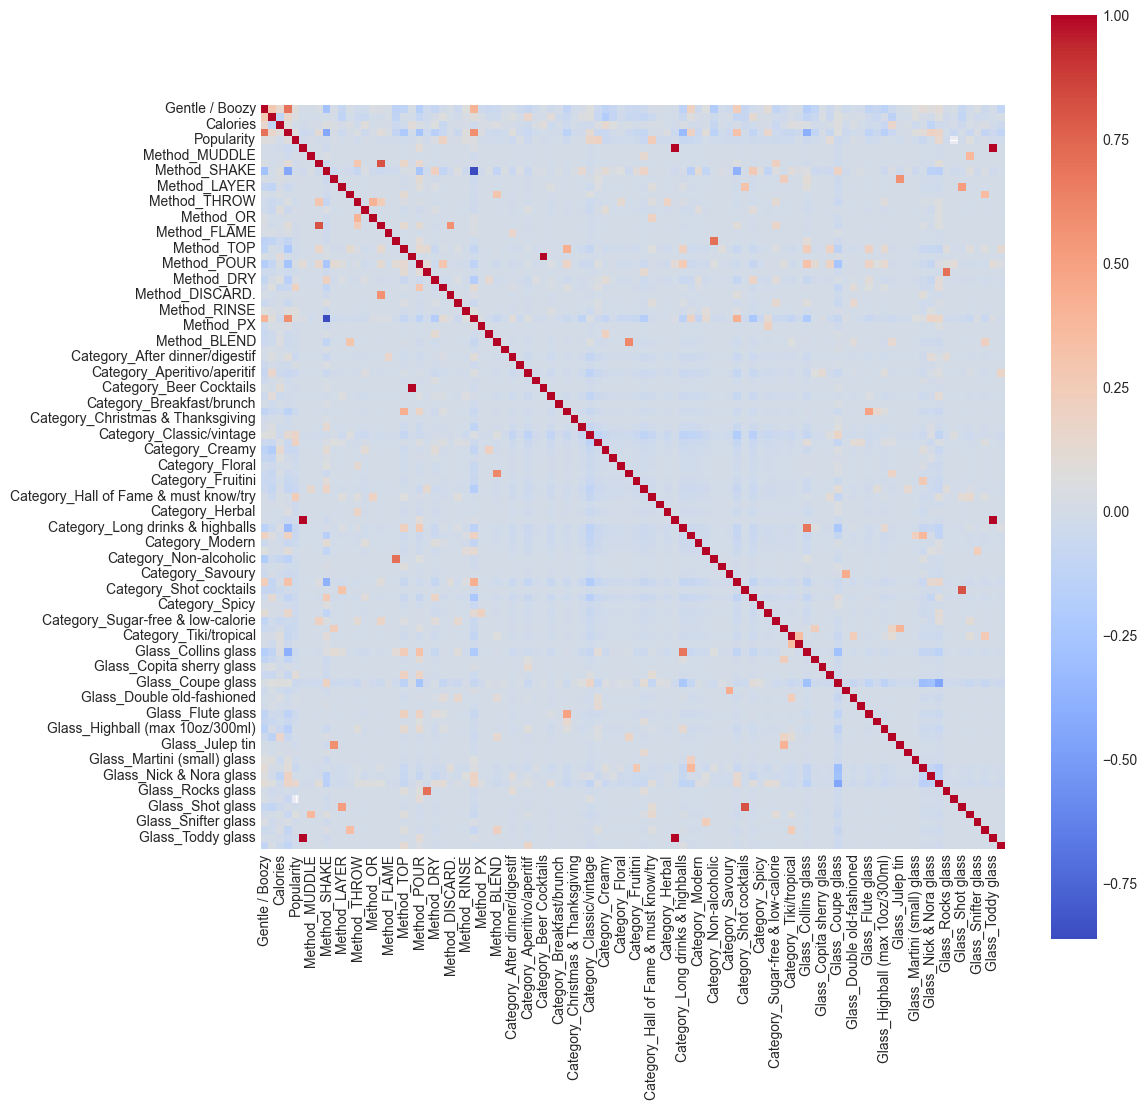

In [216]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.show()

Top 20 correlated attribute pairs:
Method_STIR                       Method_SHAKE                -0.863537
Method_STRAIN                     Method_DISCARD               0.816158
Category_Shot cocktails           Glass_Shot glass             0.816158
Method_ADD                        Glass_Rocks glass            0.706814
Method_FILL                       Category_Non-alcoholic       0.706814
Gentle / Boozy                    Alcohol percentage           0.695940
Category_Long drinks & highballs  Glass_Collins glass          0.685136
Category_Frozen (blended)         Method_BLEND                 0.613045
Method_STIR                       Alcohol percentage           0.583940
Glass_Julep tin                   Method_SWIZZLE               0.576871
Method_DISCARD.                   Method_DISCARD               0.576871
Method_LAYER                      Glass_Shot glass             0.514896
Category_Champagne                Glass_Flute glass            0.494222
Glass_Coupe glass            

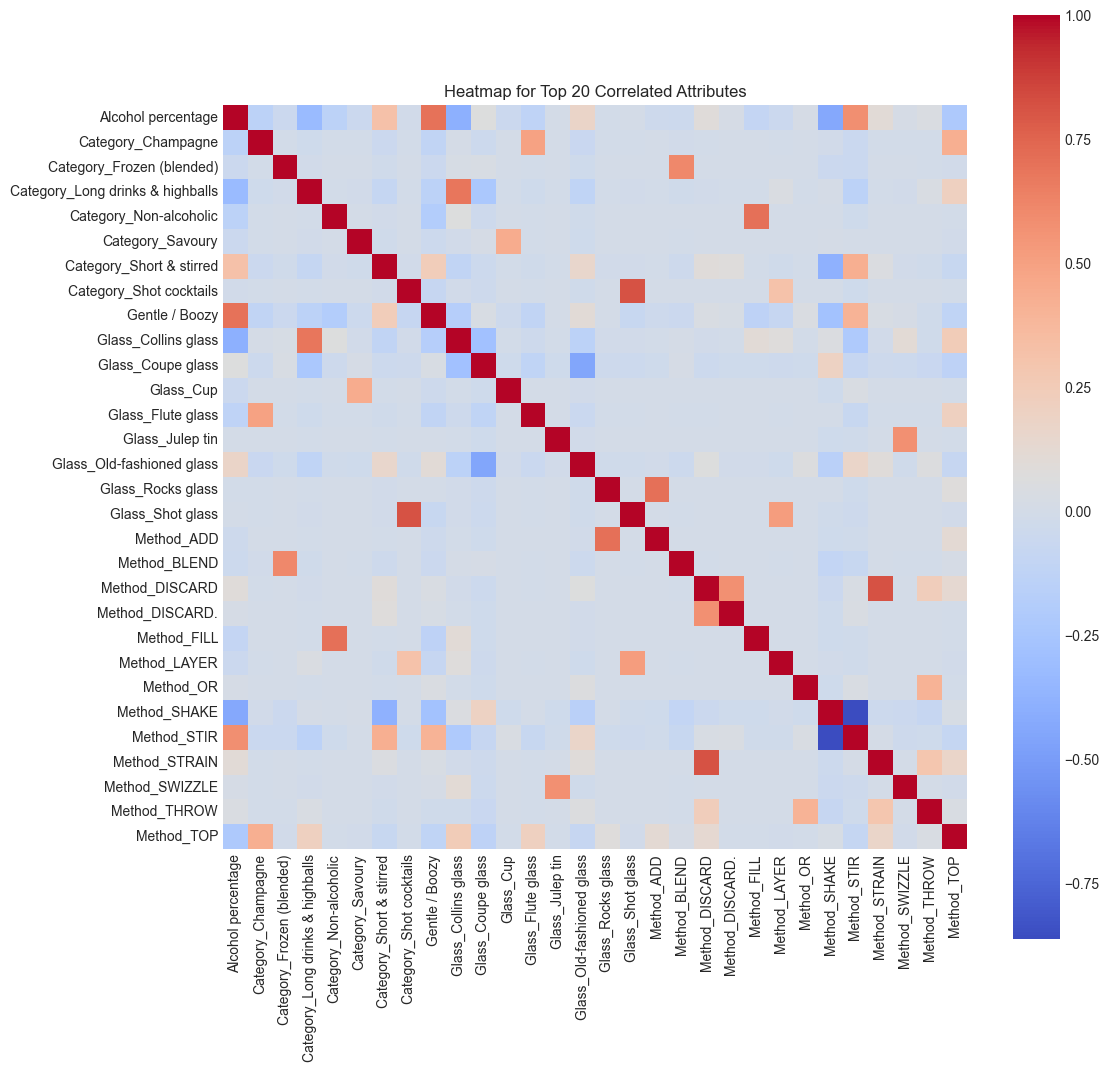

In [217]:
def get_top_correlations(correlation_matrix, n=20):
    """
    Get the top n correlated attribute pairs from the correlation matrix.
    
    :param correlation_matrix: The correlation matrix
    :param n: The number of top correlated pairs to return
    :return: A sorted DataFrame with attribute pairs and their correlations
    """
    attribute_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", key=lambda x: abs(x), ascending=False)
    attribute_pairs = attribute_pairs[attribute_pairs != 1]  # Remove self-correlations (correlation of 1)
    attribute_pairs = attribute_pairs.drop_duplicates()
    return attribute_pairs.head(n)

def get_top_correlated_attributes(correlation_matrix, n=20):
    """
    Get the top n correlated attributes from the correlation matrix.
    
    :param correlation_matrix: The correlation matrix
    :param n: The number of top correlated pairs to consider
    :return: A sorted set of attributes from the top correlated pairs
    """
    top_correlations = get_top_correlations(correlation_matrix, n)
    attributes = set()
    for pair in top_correlations.index:
        attributes.add(pair[0])
        attributes.add(pair[1])
    return sorted(attributes)

correlation_matrix = df.corr()

# Get the top 20 correlated attribute pairs and their attributes
top_attributes = get_top_correlated_attributes(correlation_matrix, 20)
top_correlations = get_top_correlations(correlation_matrix, 20)

# Create a new correlation matrix using only the top correlated attributes
top_correlation_matrix = df[top_attributes].corr()

# Display the top correlated attribute pairs
print("Top 20 correlated attribute pairs:")
print(top_correlations)

# Plot the heatmap for the top correlated attributes
plt.figure(figsize=(12, 12))
sns.heatmap(top_correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Heatmap for Top 20 Correlated Attributes")
plt.show()

Category distribution: Visualize the distribution of cocktail categories.


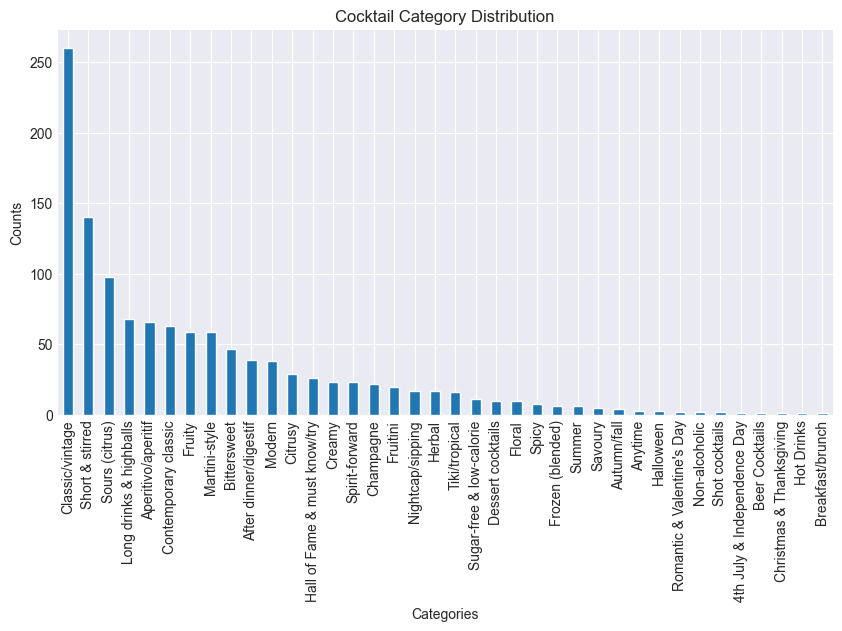

In [218]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar')
plt.title("Cocktail Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.show()

Method distribution: Visualize the distribution of cocktail methods (e.g., SHAKE, STIR).

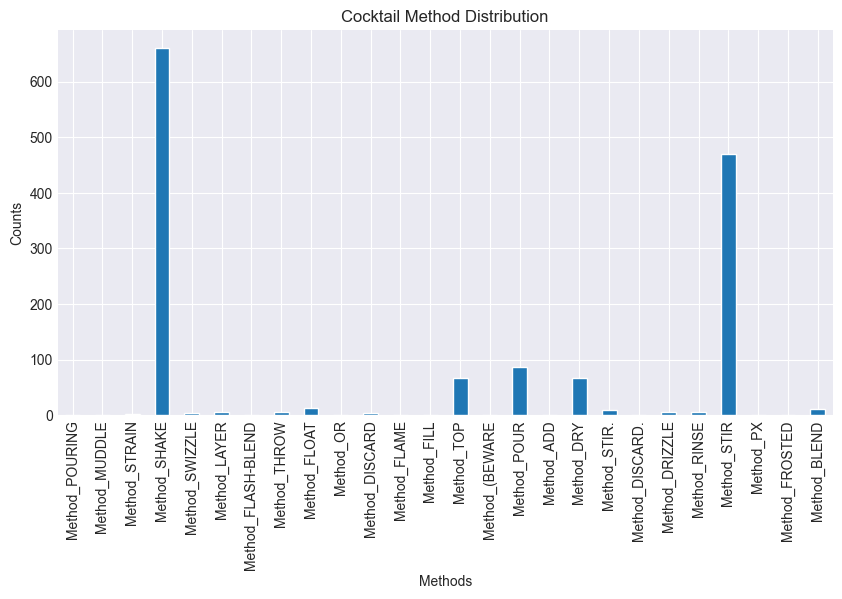

In [219]:
method_columns = [col for col in df.columns if col.startswith('Method_')]
method_counts = df[method_columns].sum()

plt.figure(figsize=(10, 5))
method_counts.plot(kind='bar')
plt.title("Cocktail Method Distribution")
plt.xlabel("Methods")
plt.ylabel("Counts")
plt.show()

Most common ingredients: Find the most common ingredients and visualize their frequency.

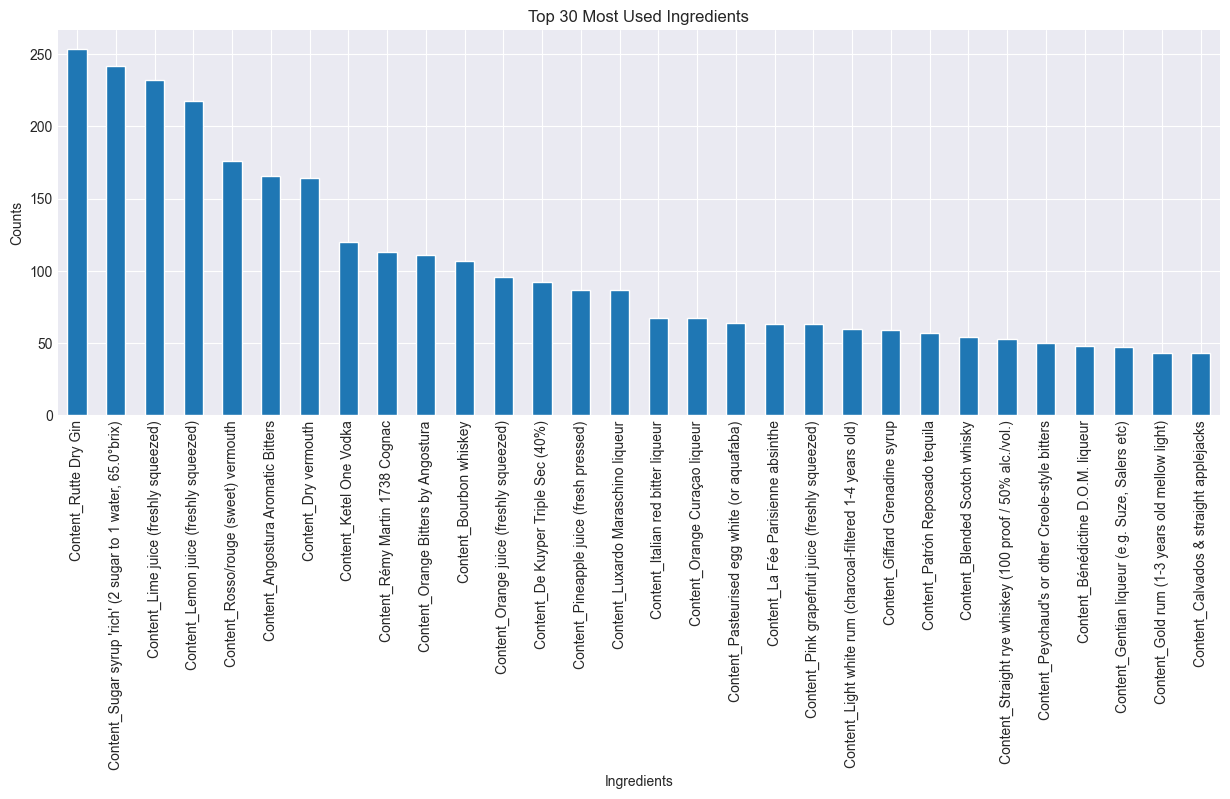

In [220]:
ingredient_columns = [col for col in df.columns if col.startswith('Content_')]
ingredient_counts = df[ingredient_columns].sum()

# Convert ingredient_counts to numeric values
ingredient_counts = pd.to_numeric(ingredient_counts, errors='coerce')

plt.figure(figsize=(15, 5))
ingredient_counts.nlargest(30).plot(kind='bar')
plt.title("Top 30 Most Used Ingredients")
plt.xlabel("Ingredients")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()


Most common values for the 'Gentle / Boozy', 'Sweet / Dry Sour' columns

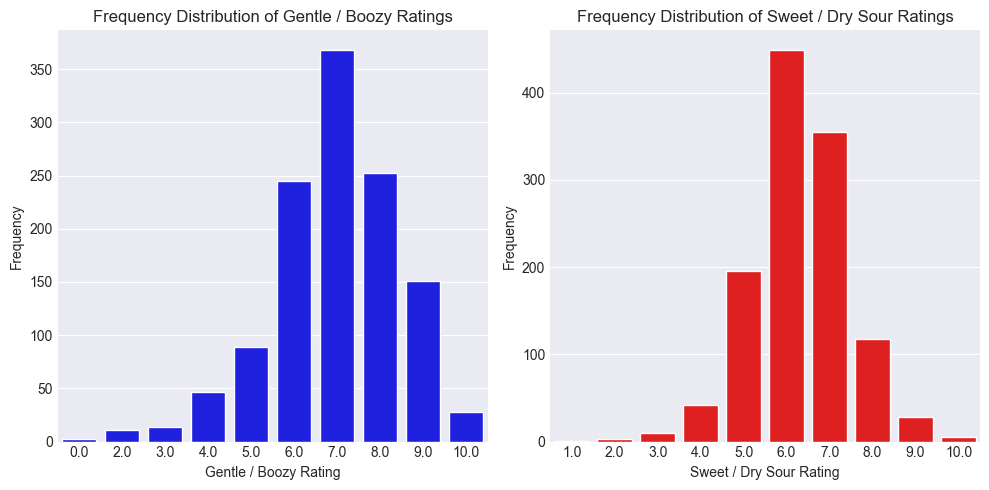

In [221]:
gentle_boozy_counts = df['Gentle / Boozy'].value_counts().sort_index()
sweet_dry_sour_counts = df['Sweet / Dry Sour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=gentle_boozy_counts.index, y=gentle_boozy_counts.values, color='b')
plt.title('Frequency Distribution of Gentle / Boozy Ratings')
plt.xlabel('Gentle / Boozy Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.barplot(x=sweet_dry_sour_counts.index, y=sweet_dry_sour_counts.values, color='r')
plt.title('Frequency Distribution of Sweet / Dry Sour Ratings')
plt.xlabel('Sweet / Dry Sour Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We can see that the frequency of the gentle / boozy dimensions resembles a normal distribution skewed towards the boozy instead of the gentle. 
Regarding the sweet / dry sour ratings, there are way more cocktails in the middle (425 vs 360) and is less skewed towards the dry sour region than sweet. We'll have to keep this in mind when building our models to avoid false positives / negatives.

Now let's look at the scatterplot:

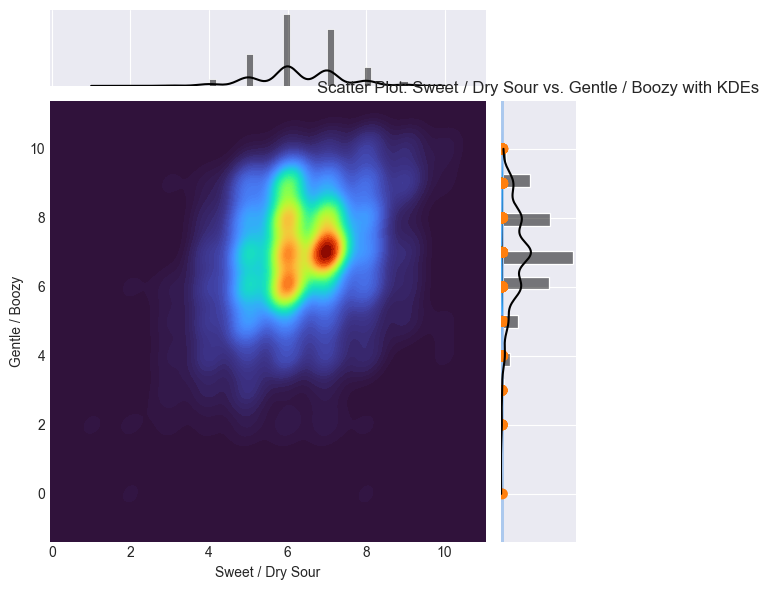

In [222]:
# Create a scatter plot of Sweet / Dry Sour vs. Gentle / Boozy with KDEs
g = sns.JointGrid(data=df, x='Sweet / Dry Sour', y='Gentle / Boozy')
g.plot_joint(sns.kdeplot, fill=True, cmap='turbo', thresh=0, levels=100)
g.plot_marginals(sns.histplot, kde=True, color='black')

# Set the colormap for the scatter plot
cmap = plt.get_cmap('turbo')

# Color the scatter plot points according to the density of points in each region
sns.kdeplot(data=df, x='Sweet / Dry Sour', y='Gentle / Boozy', levels=100, fill=True, thresh=0)
sns.scatterplot(data=df, x='Sweet / Dry Sour', y='Gentle / Boozy', edgecolor='none', s=60)

# Set plot title and labels
plt.title("Scatter Plot: Sweet / Dry Sour vs. Gentle / Boozy with KDEs")
plt.xlabel("Sweet / Dry Sour")
plt.ylabel("Gentle / Boozy")

# Show the plot
plt.show()

The first assumption is revealed here too:the data is biased towards dry/sour and gentle/boozy instead of being centered in the middle

And now delete the columns we don't need

In [224]:
# Extract columns that start with 'Content_'
content_columns = [col for col in df.columns if col.startswith('Content_')]

# Fill NaN values with 0
df[content_columns] = df[content_columns].fillna(0)

# Convert the boolean values in the alcohol dummy columns to integers
df[content_columns] = df[content_columns].astype(int)

df_alcohol = df[content_columns + ['Gentle / Boozy', 'Sweet / Dry Sour']]

# Create a new DataFrame with the relevant columns
df_relevant = df_alcohol[['Gentle / Boozy', 'Sweet / Dry Sour']].join(df[content_columns])

# Calculate the correlation matrix
correlation_matrix = df_relevant.corr()

# Extract the correlations between the alcohol dummies and the 'Gentle / Boozy' and 'Sweet / Dry Sour' columns
boozy_correlations = correlation_matrix.loc[content_columns, 'Gentle / Boozy']
sweet_correlations = correlation_matrix.loc[content_columns, 'Sweet / Dry Sour']

# Display the correlations
print("Top 30 correlations:")
get_top_correlations(correlation_matrix, n=30)


Top 30 correlations:


Content_Celery saccharum (celery syrup)        Content_Rutte Celery Dry Gin                             0.749169
Content_Ketel One Vodka (from freezer)         Content_Cranberry juice (sweetened) (chilled)            0.706814
Content_Apple sugar syrup                      Content_Kombucha                                         0.706814
Content_Savoia Americano Rosso                 Content_Rose sugar syrup                                 0.706814
Content_Ketel One Vodka (from freezer)         Content_Giffard Fraise des Bois liqueur                  0.706814
Content_Bigallet Genepi Grand Tetras           Content_Celery saccharum (celery syrup)                  0.706520
Content_Cola (e.g. Coca Cola or Pepsi Cola)    Content_Thomas Henry Ginger Ale                          0.692511
Content_Angostura Aromatic Bitters (optional)  Content_Sugar-free sweetener                             0.629551
Content_St. George Spiced Pear liqueur         Content_Pear juice (freshly pressed)             

In [225]:
# Create a new DataFrame with the alcohol columns and the 'Calories' column
df_alcohol_calories = df_alcohol[content_columns].join(df['Calories'])

# Calculate the correlation matrix
correlation_matrix_alcohol_calories = df_alcohol_calories.corr()

# Extract the correlations between the 'Calories (kcal)' column and all alcohol columns
calories_correlations = correlation_matrix_alcohol_calories.loc[content_columns, 'Calories']

# Display the correlations
#get_top_correlations(calories_correlations, n=20)

# Sort the correlations by absolute value and display the top 20
top_20_calories_correlations = calories_correlations.abs().sort_values(ascending=False).head(20)
print("Top 20 alcohols with the highest correlation to 'Calories (kcal)':\n", top_20_calories_correlations)

Top 20 alcohols with the highest correlation to 'Calories (kcal)':
 Content_Single cream / half-and-half                        0.191504
Content_Cherry Heering cherry brandy liqueur                0.185872
Content_Peychaud's or other Creole-style bitters            0.144476
Content_Italian red bitter liqueur                          0.142282
Content_Bourbon whiskey                                     0.137276
Content_De Kuyper Brown Crème de Cacao                      0.129190
Content_Straight rye whiskey (100 proof / 50% alc./vol.)    0.120796
Content_Disaronno amaretto                                  0.119727
Content_Milk (whole milk/full 3-4% fat)                     0.101016
Content_Caribbean blended rum aged 6-10 years               0.098766
Content_Angostura Aromatic Bitters                          0.097774
Content_Stout beer                                          0.094282
Content_Dry vermouth                                        0.092974
Content_Bebo Coffee Liqueur        

In [226]:
# Create a new DataFrame with the relevant columns
df_relevant_cal_alc = df_alcohol[['Gentle / Boozy', 'Sweet / Dry Sour']].join(df[['Calories', 'Alcohol percentage']])

print(df_relevant_cal_alc)

# Calculate the correlation matrix
correlation_matrix_cal_alc = df_relevant_cal_alc.corr()

print(correlation_matrix_cal_alc)

# Extract the correlations between the calorie and alcohol content columns and the 'Gentle / Boozy' and 'Sweet / Dry Sour' columns
boozy_correlations_cal_alc = correlation_matrix_cal_alc.loc[['Calories', 'Alcohol percentage'], 'Gentle / Boozy']
sweet_correlations_cal_alc = correlation_matrix_cal_alc.loc[['Calories', 'Alcohol percentage'], 'Sweet / Dry Sour']

# Display the correlations
print("Gentle / Boozy correlations:\n", boozy_correlations_cal_alc)
print("\nSweet / Dry Sour correlations:\n", sweet_correlations_cal_alc)


      Gentle / Boozy  Sweet / Dry Sour  Calories  Alcohol percentage
3                7.0               7.0       133               20.97
7                7.0               6.0       142               21.20
10               6.0               6.0       117               11.69
14               7.0               6.0       190               23.43
15               6.0               6.0       212               14.44
...              ...               ...       ...                 ...
6537             7.0               7.0       159               14.03
6538             8.0               7.0       145               22.60
6566             8.0               7.0       140               28.16
6567             5.0               6.0       201               11.37
6568             8.0               5.0       275               15.64

[1207 rows x 4 columns]
                    Gentle / Boozy  Sweet / Dry Sour  Calories  \
Gentle / Boozy            1.000000          0.275415  0.144793   
Sweet / Dry Sou